Introduction:
The objective of this project is to extract 311 data from a specified URL and organize it into manageable chunks by year and month. This data extraction process is necessary to ensure that each subset of the data is under 100MB, allowing us to host an append-only data warehouse on GitHub. 

Action Items:
1. Obtain cleaning rules from the 311-data repository and provide a link to these rules in the "Resources" section below.
2. Retrieve city data from the specified URL.
3. Split the data by year and further partition it by month.
4. Document the data cleaning procedures within the Jupyter notebook.
5. Create a Jupyter notebook to access and manipulate the data, including detailed notes on the applied cleaning rules.
6. Develop a website, preferably using GitHub Pages (ghpages), to showcase the Jupyter notebook. This website will enable users to view and interact with the data without the need to download or install any additional software.

By following these action items, we aim to streamline the process of accessing, cleaning, and presenting the 311 data, ultimately facilitating its use for analysis and exploration.

Steps to achive intial objectives
1. **Data Acquisition**: Obtain 311 data from the specified URL.
2. **Data Cleaning**: Implement cleaning rules to standardize the data
3. **Data Exploration**: Create a Jupyter notebook to explore and document the data cleaning process.
4. **Data Splitting**: Divide the dataset into smaller subsets by year and month.


In [1]:
# Importing the necessary library 
import requests
import pandas as pd

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings  

# Ignore warnings
warnings.filterwarnings('ignore')

# Data Access from URL

In [2]:
# URL of the CSV file to download
url="https://data.lacity.org/api/views/b7dx-7gc3/rows.csv?accessType=DOWNLOAD"

#print(url)

# Sending a GET request to the specified URL and storing the response
response=requests.get(url)

In [3]:
#Output file path
output_file = "./Data_cvsfiles/2024.csv"

In [6]:
# Check if request was successful
if response.status_code == 200:
    # Open the output file in write-binary mode
    with open(output_file, 'wb') as file:
        # Write the fetched data to the file
        file.write(response.content)
    print(f"Data saved successfully to {output_file}")
else:
    print(f"Failed to fetch data from {url}. Status code: {response.status_code}")

FileNotFoundError: [Errno 2] No such file or directory: './Data_cvsfiles/2024.csv'

In [ ]:
# Read the output CSV file into a DataFrame

data=pd.read_csv(output_file)

# Inspect Data

In [ ]:
# Display the first few rows of the dataset for initial examination

data.head()

,SRNumber,CreatedDate,UpdatedDate,ActionTaken,Owner,RequestType,Status,RequestSource,CreatedByUserOrganization,MobileOS,...,Location,TBMPage,TBMColumn,TBMRow,APC,CD,CDMember,NC,NCName,PolicePrecinct
0,1-4601720641,01/01/2024 12:00:06 AM,01/03/2024 10:37:51 AM,SR Created,LASAN,Bulky Items,Closed,Call,LASAN,NaN,...,POINT (-118.342143549 34.0211832597),673.0,D,1.0,South Los Angeles APC,10.0,Heather Hutt,75.0,West Adams,SOUTHWEST
1,1-4601721601,01/01/2024 12:05:06 AM,01/01/2024 12:05:06 AM,SR Created,BSL,Multiple Streetlight Issue,Open,Self Service,Self Service,NaN,...,POINT (-118.3036039481 33.789784475205),793.0,J,5.0,Harbor APC,15.0,Tim McOsker,92.0,Harbor City,HARBOR
2,1-4601723091,01/01/2024 12:06:54 AM,01/01/2024 12:06:56 AM,SR Created,BSL,Single Streetlight Issue,Open,Mobile App,Self Service,iOS,...,POINT (-118.36056718 34.0858735),593.0,B,6.0,Central APC,5.0,Katy Yaroslavsky,58.0,Mid-City West,WILSHIRE
3,1-4601721751,01/01/2024 12:11:45 AM,01/02/2024 07:01:31 PM,SR Created,LASAN,Bulky Items,Closed,Mobile App,Self Service,Android,...,POINT (-118.533785604 34.2067120073),530.0,J,4.0,South Valley APC,4.0,Nithya Raman,15.0,Reseda,WEST VALLEY
4,1-4601723281,01/01/2024 12:18:03 AM,01/29/2024 09:06:38 AM,SR Created,OCB,Graffiti Removal,Closed,Mobile App,Self Service,iOS,...,POINT (-118.28067055 34.0423584867),634.0,B,5.0,Central APC,1.0,Eunisses Hernandez,76.0,Pico Union,RAMPART


In [ ]:
# Provide information about the dataset's structure, including data types and memory usage

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471489 entries, 0 to 471488
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   SRNumber                   471489 non-null  object 
 1   CreatedDate                471489 non-null  object 
 2   UpdatedDate                471489 non-null  object 
 3   ActionTaken                471489 non-null  object 
 4   Owner                      471489 non-null  object 
 5   RequestType                471489 non-null  object 
 6   Status                     471489 non-null  object 
 7   RequestSource              471489 non-null  object 
 8   CreatedByUserOrganization  471489 non-null  object 
 9   MobileOS                   165862 non-null  object 
 10  Anonymous                  471489 non-null  object 
 11  AssignTo                   467468 non-null  object 
 12  ServiceDate                431619 non-null  object 
 13  ClosedDate                 43

In [ ]:
# Compute and display summary statistics of numerical columns to understand the data distribution
data.describe()

,HouseNumber,Latitude,Longitude,TBMPage,TBMRow,CD,NC
count,403147.000000,471252.000000,471252.000000,471245.000000,471245.000000,471251.000000,464967.000000
mean,6330.854408,34.089089,-118.361890,607.839958,4.091184,8.296683,57.248243
std,5818.401468,0.119670,0.109526,83.923054,1.927684,4.382230,34.620567
min,1.000000,33.706052,-118.667841,480.000000,1.000000,1.000000,4.000000
25%,1440.000000,34.025251,-118.440741,532.000000,2.000000,5.000000,25.000000
50%,4561.000000,34.077527,-118.335391,595.000000,4.000000,8.000000,54.000000
75%,10035.000000,34.187593,-118.278580,671.000000,6.000000,12.000000,86.000000
max,29199.000000,34.334335,-118.155835,4724.000000,7.000000,15.000000,128.000000


In [ ]:
# Identify missing values in the dataset and report the count of missing values for each column
data.isnull().sum()

SRNumber                          0
CreatedDate                       0
UpdatedDate                       0
ActionTaken                       0
Owner                             0
RequestType                       0
Status                            0
RequestSource                     0
CreatedByUserOrganization         0
MobileOS                     305627
Anonymous                         0
AssignTo                       4021
ServiceDate                   39870
ClosedDate                    36516
AddressVerified                   0
ApproximateAddress           194137
Address                         123
HouseNumber                   68342
Direction                     31495
StreetName                    68341
Suffix                        37563
ZipCode                         312
Latitude                        237
Longitude                       237
Location                        237
TBMPage                         244
TBMColumn                       244
TBMRow                      

In [ ]:
# Dimensions of the Dataset
data.shape


(471489, 34)

In [ ]:
# Column Names in the Dataset

data.columns

Index(['SRNumber', 'CreatedDate', 'UpdatedDate', 'ActionTaken', 'Owner',
       'RequestType', 'Status', 'RequestSource', 'CreatedByUserOrganization',
       'MobileOS', 'Anonymous', 'AssignTo', 'ServiceDate', 'ClosedDate',
       'AddressVerified', 'ApproximateAddress', 'Address', 'HouseNumber',
       'Direction', 'StreetName', 'Suffix', 'ZipCode', 'Latitude', 'Longitude',
       'Location', 'TBMPage', 'TBMColumn', 'TBMRow', 'APC', 'CD', 'CDMember',
       'NC', 'NCName', 'PolicePrecinct'],
      dtype='object')

RequestType
Bulky Items                   221238
Graffiti Removal              108469
Metal/Household Appliances     37702
Illegal Dumping Pickup         34762
Homeless Encampment            27640
Electronic Waste               13044
Dead Animal Removal            10021
Multiple Streetlight Issue      7766
Single Streetlight Issue        6925
Other                           3237
Report Water Waste               409
Feedback                         276
Name: count, dtype: int64


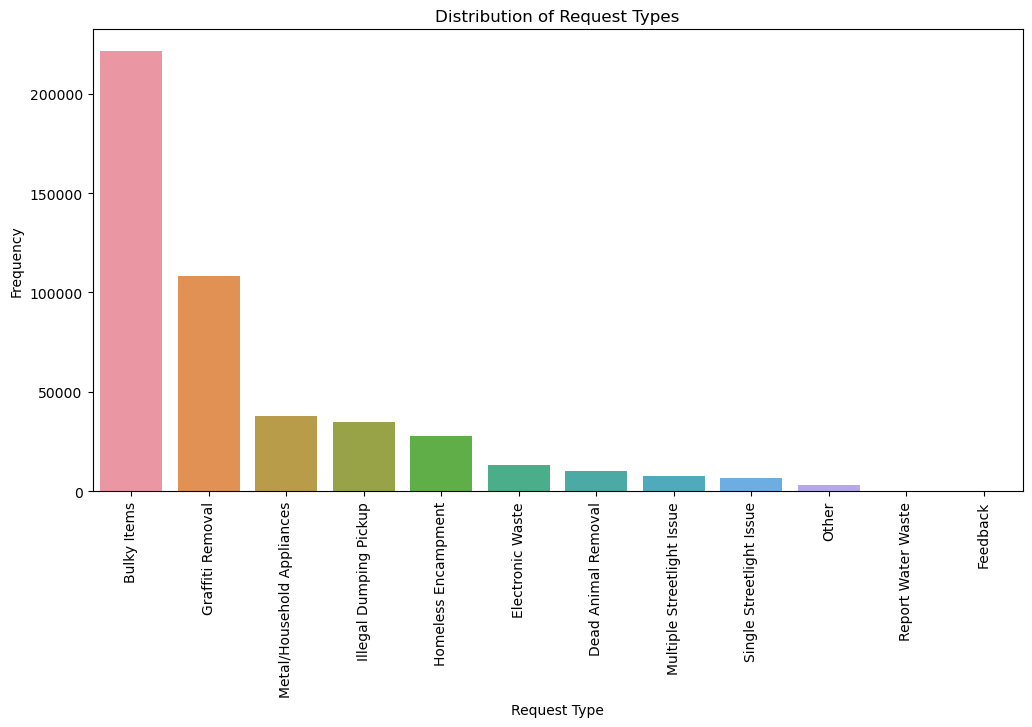

In [ ]:

# Count the frequency of each category in 'RequestType'
request_type_counts = data['RequestType'].value_counts()
print(request_type_counts)
# Create a bar plot
plt.figure(figsize=(12, 6))  # Adjust size if needed
sns.barplot(x=request_type_counts.index, y=request_type_counts.values)
plt.title('Distribution of Request Types')
plt.xlabel('Request Type')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


Line Charts of Service Requests Over Time by Type

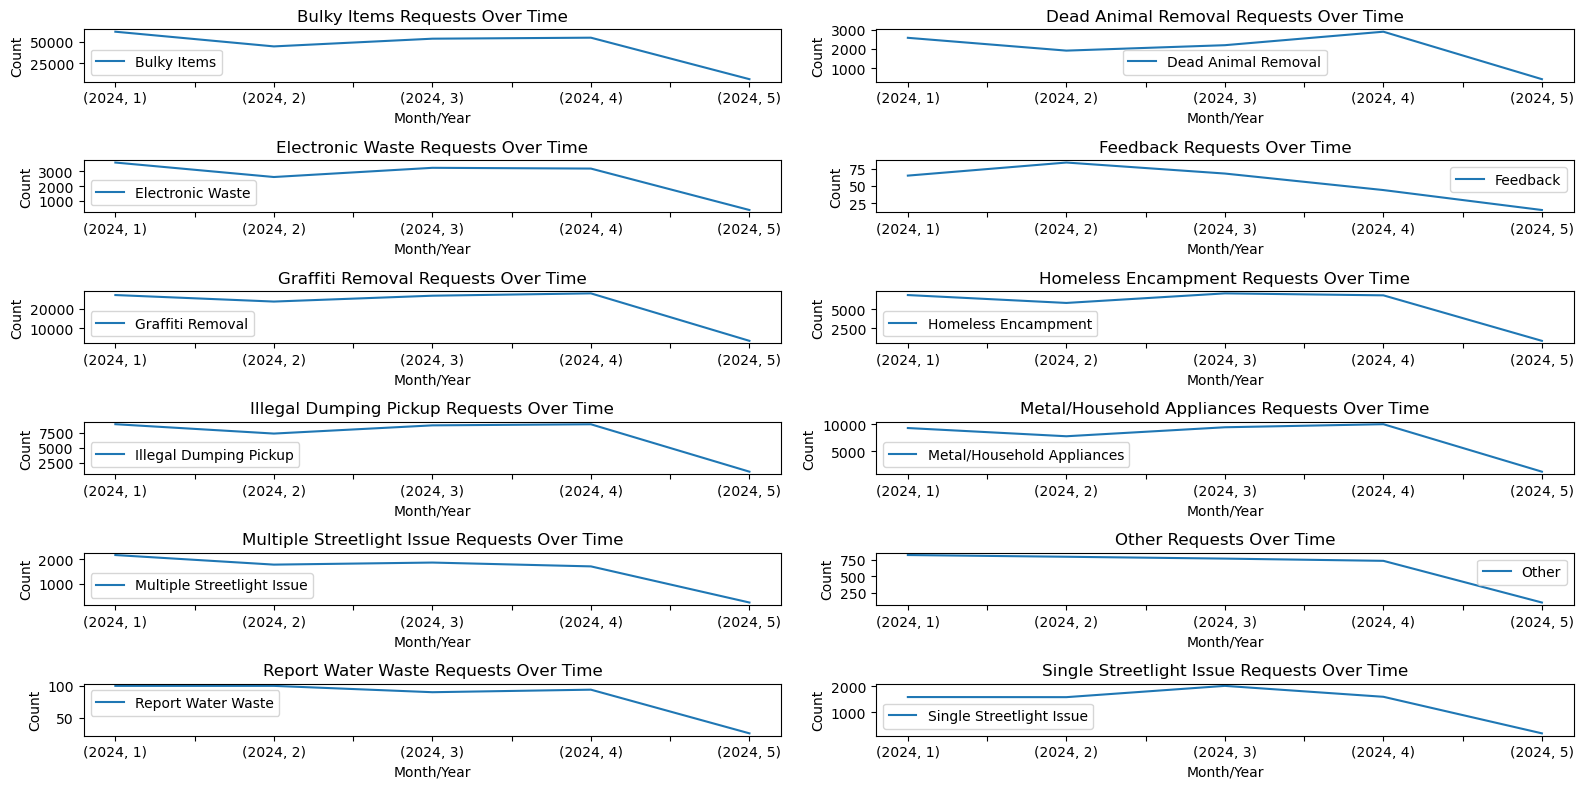

In [ ]:
# Assuming 'CreatedDate' column is in datetime format
data['CreatedDate'] = pd.to_datetime(data['CreatedDate'])

# Extract month and year
data['Month'] = data['CreatedDate'].dt.month
data['Year'] = data['CreatedDate'].dt.year

# Group by service request type, month, and year
grouped_data = data.groupby(['RequestType', 'Year', 'Month']).size().unstack(level=0, fill_value=0)

# Get unique service request types
request_types = grouped_data.columns

# Determine number of rows and columns for subplots
num_rows = (len(request_types) + 1) // 2  # Add 1 to round up
num_cols = 2

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(16, 8))

# Plot line charts for each service request type
for i, request_type in enumerate(request_types):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    grouped_data[request_type].plot(ax=ax, kind='line', legend=True)
    ax.set_title(f'{request_type} Requests Over Time')
    ax.set_xlabel('Month/Year')
    ax.set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

Service Requests Over Time by Request Type



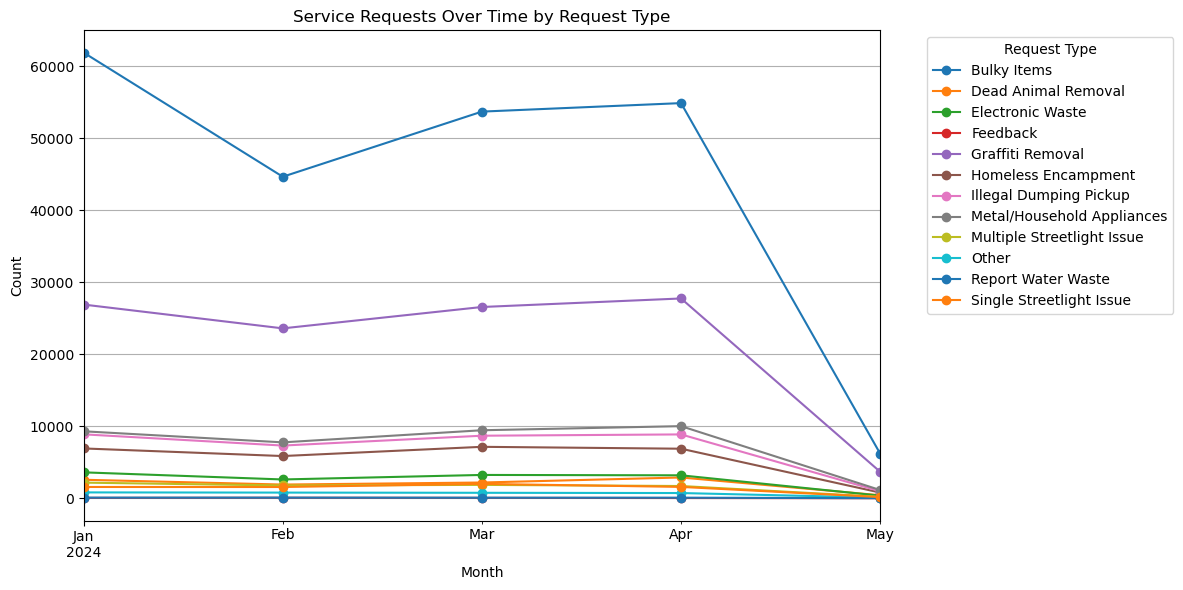

In [ ]:
# Assuming 'CreatedDate' column is in datetime format
data['CreatedDate'] = pd.to_datetime(data['CreatedDate'])

# Extract month and year
data['Month'] = data['CreatedDate'].dt.to_period('M')

# Group by month and count service requests
monthly_counts = data.groupby('Month')['RequestType'].value_counts().unstack(fill_value=0)

# Plot line charts for each month
monthly_counts.plot(kind='line', figsize=(12, 6), marker='o')
plt.title('Service Requests Over Time by Request Type')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Request Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

Total Service Requests Over Time


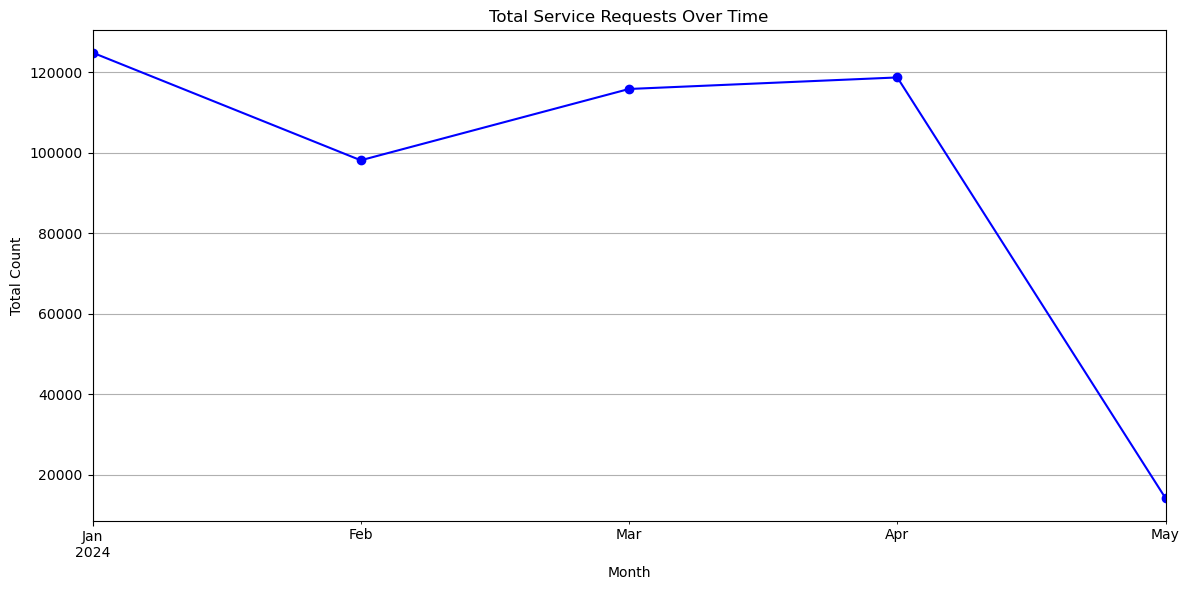

In [ ]:
# Assuming 'CreatedDate' column is in datetime format
data['CreatedDate'] = pd.to_datetime(data['CreatedDate'])

# Extract month and year
data['Month'] = data['CreatedDate'].dt.to_period('M')

# Group by month and count total service requests
monthly_total_counts = data.groupby('Month').size()

# Plot line chart for total service requests over time
monthly_total_counts.plot(kind='line', figsize=(12, 6), marker='o', color='blue')
plt.title('Total Service Requests Over Time')
plt.xlabel('Month')
plt.ylabel('Total Count')
plt.grid(True)
plt.tight_layout()
plt.show()


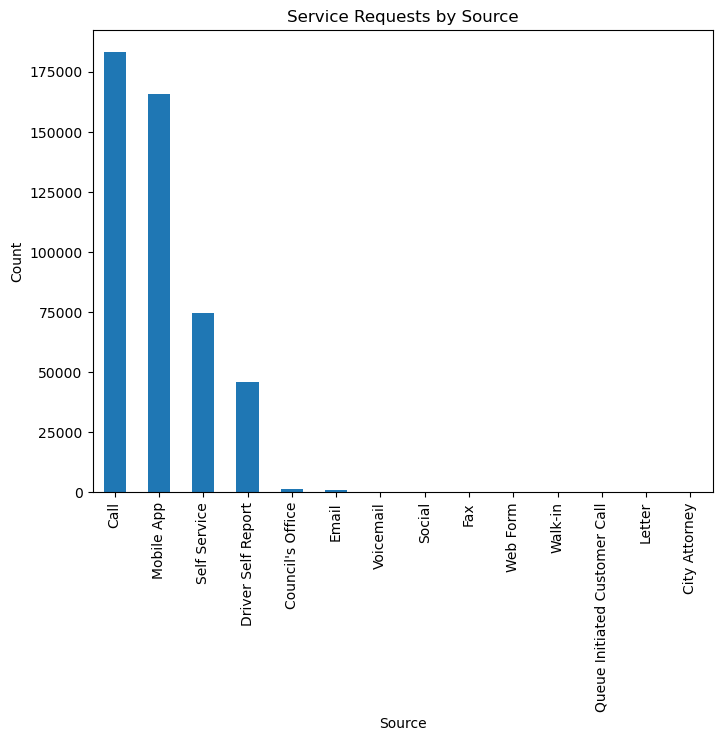

In [ ]:
# Bar chart: Service requests by source
source_counts = data['RequestSource'].value_counts()
source_counts.plot(kind='bar', figsize=(8, 6))
plt.title('Service Requests by Source')
plt.xlabel('Source')
plt.ylabel('Count')
plt.show()



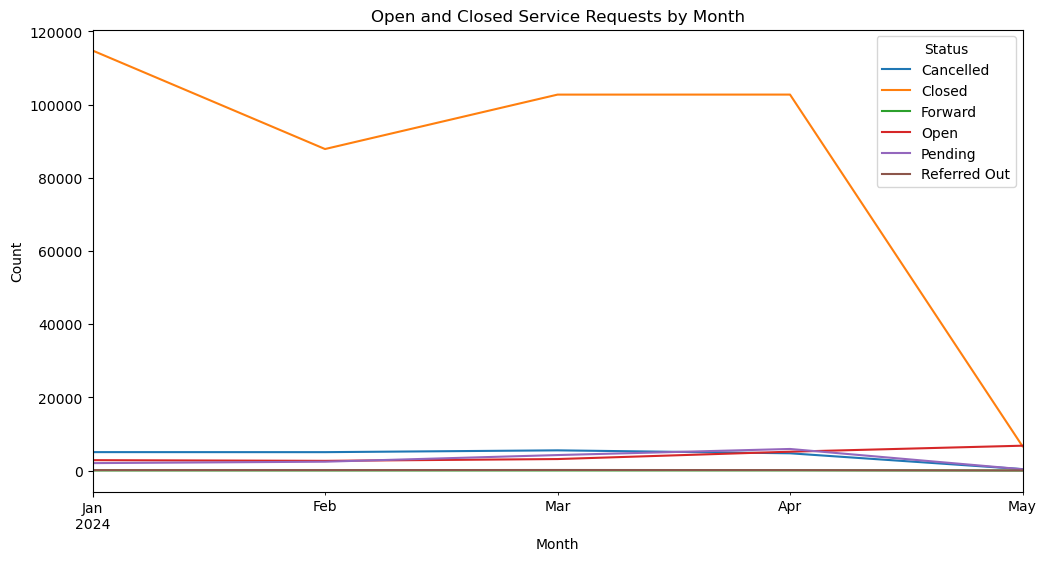

Total Counts for Each Status:
              Total Count
Status                   
Cancelled           20657
Closed             414775
Forward               110
Open                20546
Pending             14899
Referred Out          502


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'CreatedDate' column is in datetime format
data['CreatedDate'] = pd.to_datetime(data['CreatedDate'])

# Extract month and year
data['Month'] = data['CreatedDate'].dt.to_period('M')

# Group by month and status
monthly_counts = data.groupby(['Month', 'Status']).size().unstack(fill_value=0)

# Plot the counts for open and closed service requests for each month
ax = monthly_counts.plot(kind='line', figsize=(12, 6))
plt.title('Open and Closed Service Requests by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Status')
plt.show()

# Display total counts in a table
total_counts = monthly_counts.sum()
total_counts_table = pd.DataFrame(total_counts, columns=['Total Count'])
print("Total Counts for Each Status:")
print(total_counts_table)


In [ ]:
ncname_counts = data['NCName'].value_counts()
print(ncname_counts)

NCName
Boyle Heights                     15956
Downtown Los Angeles              11212
Empowerment Congress Southeast    11034
Wilshire Center-Koreatown         10766
Van Nuys                          10524
                                  ...  
Westwood                           1667
Elysian Valley Riverside            900
Arts District Little Tokyo          707
North Westwood                      548
Hermon                              485
Name: count, Length: 99, dtype: int64


In [ ]:
# Count total occurrences of 'NCName'
ncname_total_count = data['NCName'].count()

# Display the total count
print("Total count of NCName:", ncname_total_count)


Total count of NCName: 464967


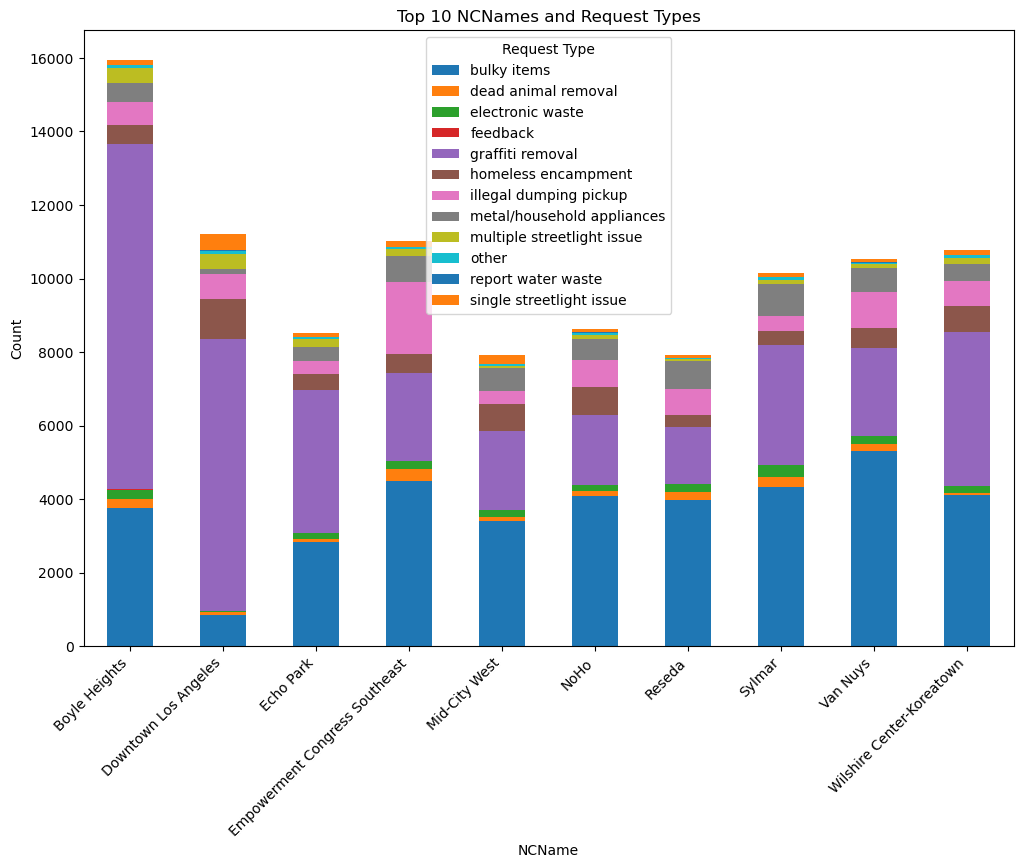

In [ ]:
# Get the top 10 NCNames
top_ncnames = data['NCName'].value_counts().head(10).index

# Filter the data for the top 10 NCNames
filtered_data = data[data['NCName'].isin(top_ncnames)]

# Group by NCName and RequestType and count occurrences
ncname_request_counts = filtered_data.groupby(['NCName', 'RequestType']).size().unstack(fill_value=0)

# Plot the bar chart
ncname_request_counts.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Top 10 NCNames and Request Types')
plt.xlabel('NCName')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Request Type')
plt.show()


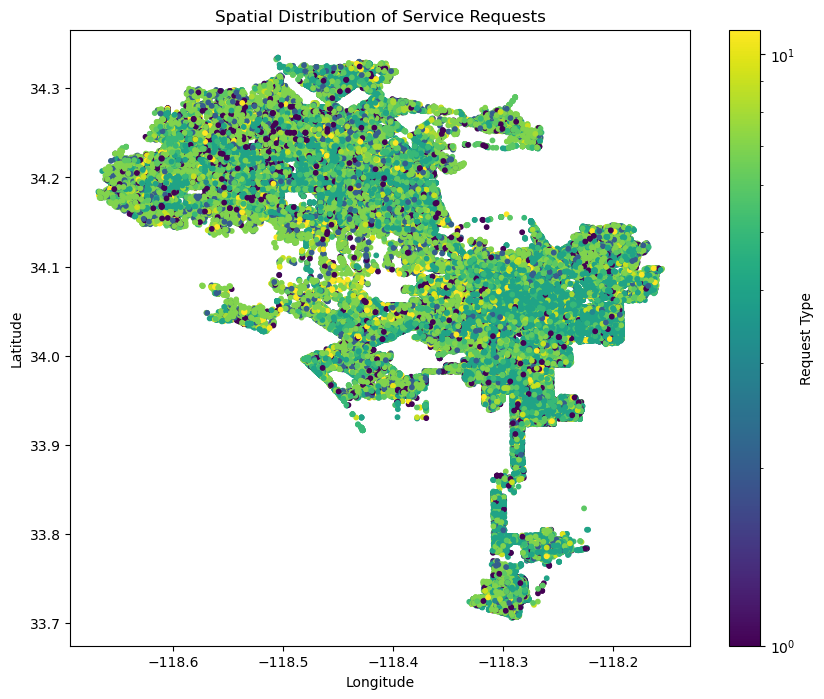

In [ ]:

from matplotlib.colors import LogNorm
#import geopandas as gpd

# Convert the 'RequestType' column to a categorical data type
geo_data['RequestType'] = geo_data['RequestType'].astype('category')

# Create a scatter plot to visualize the spatial distribution of service requests
fig, ax = plt.subplots(figsize=(10, 8))
sc = ax.scatter(x=geo_data['Longitude'], y=geo_data['Latitude'], c=geo_data['RequestType'].cat.codes, cmap='viridis', norm=LogNorm(), s=10)
plt.colorbar(sc, label='Request Type')
plt.title('Spatial Distribution of Service Requests')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

<Axes: >

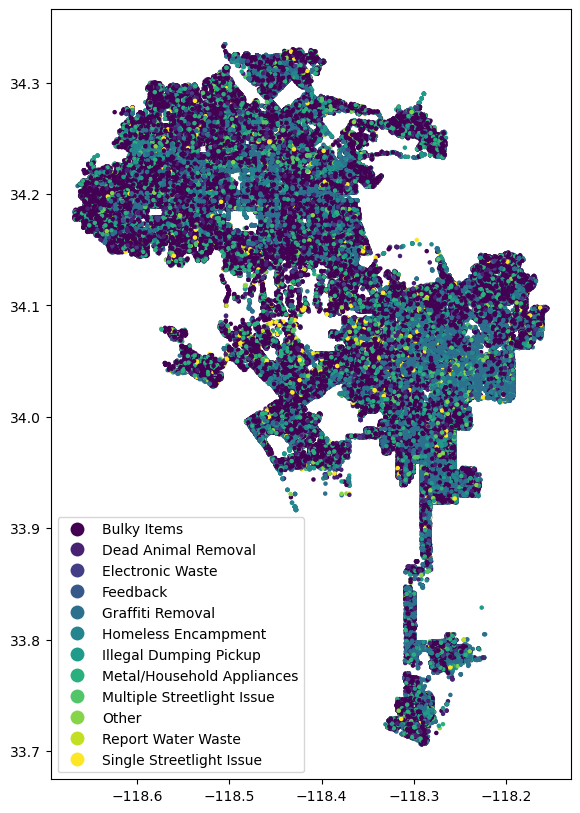

In [ ]:
import geopandas as gpd
from shapely.geometry import Point

# Create a GeoDataFrame from the service request data
geometry = [Point(xy) for xy in zip(data['Longitude'], data['Latitude'])]
geo_data = gpd.GeoDataFrame(data, geometry=geometry, crs='EPSG:4326')

# Plot the data with a larger size
geo_data.plot(column='RequestType', cmap='viridis', legend=True, markersize=5, figsize=(20, 10))

# Data Cleaning

In [ ]:
# Remove duplicates
print(f"Number of duplicate rows: {data.duplicated().sum()}")
data.drop_duplicates(inplace=True)


In [ ]:
# Checking for missing values
null_counts = data.isnull().sum()
print("Columns with missing values:\n", null_counts[null_counts > 0])




Columns with missing values:
 MobileOS              305627
AssignTo                4021
ServiceDate            39870
ClosedDate             36516
ApproximateAddress    194137
Address                  123
HouseNumber            68342
Direction              31495
StreetName             68341
Suffix                 37563
ZipCode                  312
Latitude                 237
Longitude                237
Location                 237
TBMPage                  244
TBMColumn                244
TBMRow                   244
APC                      265
CD                       238
CDMember               41634
NC                      6522
NCName                  6522
PolicePrecinct           254
dtype: int64


In [ ]:
#Handling missing values based on column-specific strategies :  For example, impute categorical columns with mode and numeric columns with mean or median

data['MobileOS'].fillna(data['MobileOS'].mode()[0], inplace=True)
#data['Anonymous'].fillna('N', inplace=True)  # Assuming 'N' means not anonymous
#data['Latitude'].fillna(data['Latitude'].mean(), inplace=True)
#data['Longitude'].fillna(data['Longitude'].mean(), inplace=True)


# # Impute missing values using KNN imputation
# numerical_cols = data.select_dtypes(include=['float64']).columns
# imputer = KNNImputer()
# data[numerical_cols] = imputer.fit_transform(data[numerical_cols])

In [53]:
# Check and convert data types
print("\nData types:")
print(data.dtypes)

# Convert date columns to datetime
date_cols = ['CreatedDate', 'UpdatedDate', 'ServiceDate', 'ClosedDate']
for col in date_cols:
    data[col] = pd.to_datetime(data[col], errors='coerce')


Data types:
SRNumber                             object
CreatedDate                  datetime64[ns]
UpdatedDate                          object
ActionTaken                          object
Owner                                object
RequestType                          object
Status                               object
RequestSource                        object
CreatedByUserOrganization            object
MobileOS                             object
Anonymous                            object
AssignTo                             object
ServiceDate                          object
ClosedDate                           object
AddressVerified                      object
ApproximateAddress                   object
Address                              object
HouseNumber                         float64
Direction                            object
StreetName                           object
Suffix                               object
ZipCode                              object
Latitude           

In [57]:
# Remove Unnecessary Columns - Remove columns not useful for analysis
#unnecessary_columns = ['SRNumber', 'Anonymous','TBMPage', 'TBMColumn', 'TBMRow']
#data.drop(columns=unnecessary_columns, inplace=True)


In [59]:
# Categorical Data Cleaning
# Convert categorical variables to lowercase for consistency
cat_columns = ['ActionTaken', 'RequestType', 'Status', 'RequestSource', 'CreatedByUserOrganization']
data[cat_columns] = data[cat_columns].apply(lambda x: x.str.lower())


# # Handle categorical data
# categorical_cols = data.select_dtypes(include=['object']).columns
# data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

In [ ]:
#Numeric Data Cleaning

In [ ]:
# Address Parsing
# Split the 'Address' column into separate components
#df[['HouseNumber', 'Direction', 'StreetName', 'Suffix', 'ZipCode']] = df['Address'].str.split(expand=True)


In [ ]:
# Geospatial Data Cleaning
# Validate latitude and longitude values within appropriate ranges



In [ ]:
# Data Type Conversion
# Convert data types as needed
# data['MobileOS'] = data['MobileOS'].astype('category')
# data['Anonymous'] = data['Anonymous'].map({'Y': True, 'N': False})
#data['Latitude'] = data['Latitude'].astype(float)
#data['Longitude'] = data['Longitude'].astype(float)

# Saving 311 Data into Monthly CSV Files

In [ ]:
# 'CreatedDate' column is in datetime format
data['CreatedDate'] = pd.to_datetime(data['CreatedDate'])

# Extract month and year
data['Month'] = data['CreatedDate'].dt.to_period('M')

# Group data by month
grouped_data = data.groupby('Month')

# Directory to save CSV files
save_dir = './Data_csvfiles/'

# Iterate over each month and save data to CSV
for month, group in grouped_data:
    file_name = f'{save_dir}service_requests_{month}.csv'
    group.to_csv(file_name, index=False)
    print(f"Data for {month} saved to {file_name}")


Data for 2024-01 saved to ./Data_csvfiles/service_requests_2024-01.csv
Data for 2024-02 saved to ./Data_csvfiles/service_requests_2024-02.csv
Data for 2024-03 saved to ./Data_csvfiles/service_requests_2024-03.csv
Data for 2024-04 saved to ./Data_csvfiles/service_requests_2024-04.csv
Data for 2024-05 saved to ./Data_csvfiles/service_requests_2024-05.csv


In [ ]:
# Save cleaned data
#data.to_csv('cleaned_data.csv', index=False)